We import all the libraries necessary and set all the variables necessary.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.integrate import quad as scint
import scipy.optimize as sco

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({   'font.size': 22,
                        "font.family": "serif",
                        "font.serif": ["CMU serif"],})
plt.rc('axes', unicode_minus=False)
plt.rc('pgf', texsystem='pdflatex')
kb = const.physical_constants["Boltzmann constant in eV/K"][0]*1e3  #in meV/K
hbar = 6.58211951 * 10**(-13)  #in meV . sec

Define a function 'deltaTsim' that simulates $\Delta$ v/s T curve according to the equation . 'deltaint' performs the integration given a T, Delta and $\hbar \omega$ value. We employ another function to numerically solve the equation  for $\Delta$ by giving RHS as 'deltaint'. Thus we effectively get the $\Delta$ v/s $T$ values. 

/tmp/ipykernel_20592/2479954636.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  integ = lambda x : (np.tanh(0.5/(kb*T)*(x**2+Delta**2)**0.5))/(x**2+Delta**2)**0.5


Text(0, 0.5, '$\\Delta(T)$')

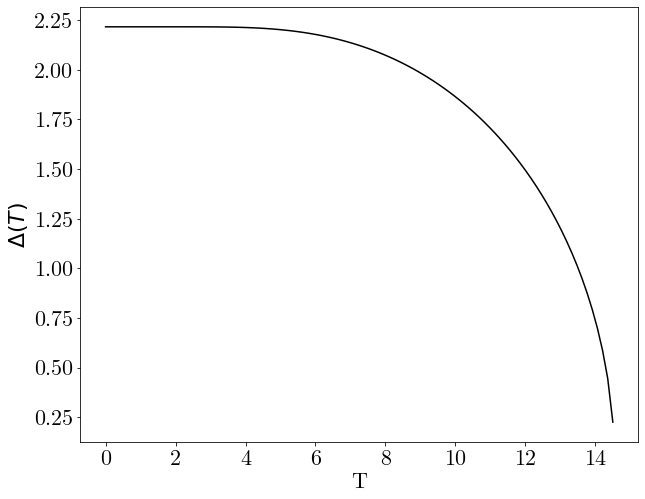

In [3]:
def deltaTsim(Tc,eta,Tarr):
    #E in meV , Delta in meV, eta is inverse interaction strength, tc in kelvin
    E = (kb * Tc)/(1.13*np.exp(-eta))
    

    def deltaint(T,Delta,E):
        integ = lambda x : (np.tanh(0.5/(kb*T)*(x**2+Delta**2)**0.5))/(x**2+Delta**2)**0.5
        return scint(integ,0,E)[0]

    def sim(E,Tarr):
        fit = np.zeros_like(Tarr)
        for i,T in enumerate(Tarr):
            func = lambda Delta : [deltaint(T,Delta,E) - eta]
            fit[i] = sco.fsolve(func, [0.05])
        return fit


    return sim(E,Tarr)

Tc =14.5
N =100
eta = 1/0.33 #inverse interaction strength
Tarr = np.linspace(0,Tc,N)
simdata = deltaTsim(Tc,eta,Tarr)


plt.plot(Tarr,simdata,'k')
plt.xlabel('T')
plt.ylabel('$\Delta(T)$')
# plt.savefig('/mnt/localdiskd/Semester 8/Project - Superconductivity/Report/images/deltavstcurveintro.pdf')

Finally we import the data we extracted from tunnel junction measurements and set a critical temperature to try and match our obtained values with the predicted curve.

/tmp/ipykernel_20592/2479954636.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  integ = lambda x : (np.tanh(0.5/(kb*T)*(x**2+Delta**2)**0.5))/(x**2+Delta**2)**0.5


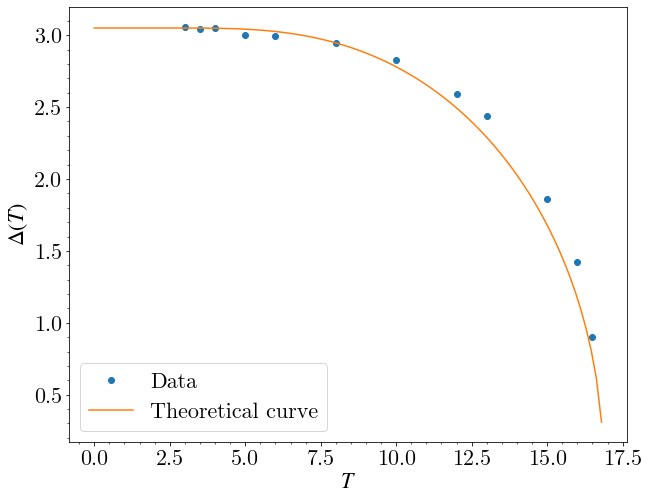

In [14]:

plt.rcParams['mathtext.fontset'] = 'stix'

data = np.transpose(np.loadtxt('/mnt/localdiskd/Semester 8/Project - Superconductivity/Code/CBS/data/Tunneljunction_NbNAloAg_29032022/TGamDelta.txt',usecols=(0,2),skiprows=1))

def fitdeltaT(data,eta):
    x, y = data[0], data[1]


    funct = lambda T,Tc : deltaTsim(Tc, eta, T)
    fitpar = sco.curve_fit(funct , x, y)


    return fitpar


Tc =16.8
N =100
eta = 3.03
Tarr = np.linspace(0,Tc,N)
fitdata = deltaTsim(Tc,eta,Tarr)

plt.plot(data[0],data[1],'o',label='Data')
plt.plot(Tarr,fitdata/fitdata[0]*3.05,label='Theoretical curve')
plt.legend()
plt.minorticks_on()
plt.xlabel('$T$')
plt.ylabel('$\Delta(T)$')
plt.savefig('/mnt/localdiskd/Semester 8/Project - Superconductivity/Report/images/deltavstcurvetun.pdf')
